In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('clean_data.csv')
df.head()

,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,eopen,tenure,recency
0,0,2012-09-28,2013-11-08,2013-11-08,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL,29,1.112329,5.065753
1,1,2010-12-19,2011-01-04,2014-01-19,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL,89,3.087671,4.868493
2,0,2010-10-22,2011-03-28,2011-03-28,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM,0,0.430137,7.684932
3,1,2010-11-27,2010-11-29,2013-01-28,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM,27,2.172603,5.843836
4,1,2008-11-17,2010-12-10,2014-01-14,46,80.434783,15.217391,175.10,0.141176,1,1,0,Wednesday,DEL,38,5.161644,4.882192


In [3]:
df['created'] = df['created'].apply(lambda x: pd.to_datetime(str(x)))
df['firstorder'] = df['firstorder'].apply(lambda x: pd.to_datetime(str(x)))
df['lastorder'] = df['lastorder'].apply(lambda x: pd.to_datetime(str(x)))

In [4]:
df.dtypes

retained               int64
created       datetime64[ns]
firstorder    datetime64[ns]
lastorder     datetime64[ns]
esent                  int64
eopenrate            float64
eclickrate           float64
avgorder             float64
ordfreq              float64
paperless              int64
refill                 int64
doorstep               int64
favday                object
city                  object
eopen                  int64
tenure               float64
recency              float64
dtype: object

In [5]:
df.shape

(25365, 17)

In [6]:
cat_cols = ['paperless','refill','doorstep','favday','city','retained']
num_cols = ['esent','eopen','eopenrate','eclickrate','avgorder','ordfreq','tenure','recency']

df1=df.copy()

In [7]:
# who opted for refill
#sns.boxplot(x=df1['retained'],y=df1[df1['refill']===1]['refill'])
df1[df1['refill']==1]['retained'].value_counts()

1    2318
0     184
Name: retained, dtype: int64

## Multivariate analysis

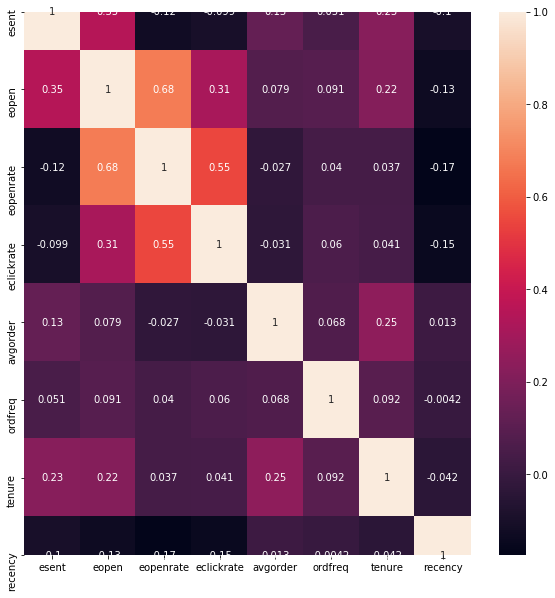

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df1[num_cols].corr(),annot=True)

### eopenrate vs tenure vs retained

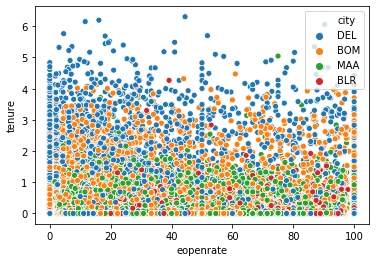

In [10]:
sns.scatterplot(df1['eopenrate'],df1['tenure'],hue=df1['city'])

## tenure vs city

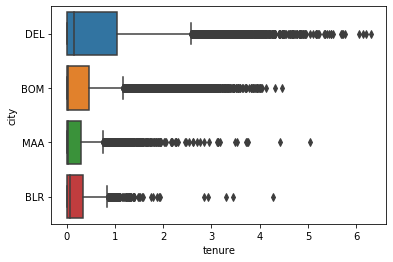

In [13]:
sns.boxplot(df1['tenure'],df1['city'])

In [20]:
#created year and month
df1['created_year'] = df1['created'].dt.year
df1['created_month'] = df1['created'].dt.month

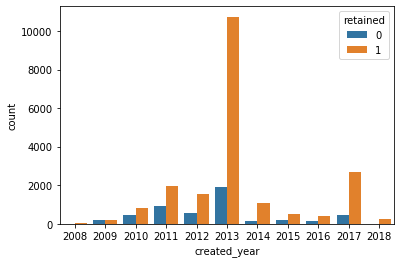

In [21]:
sns.countplot(df1['created_year'],hue=df1['retained'])

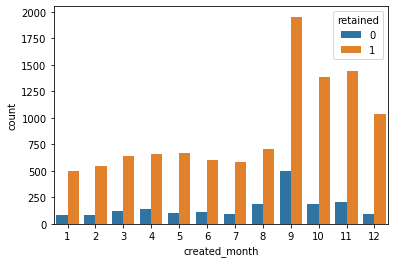

In [27]:
sns.countplot(df1[df1['created_year']==2013]['created_month'],hue=df1['retained'])

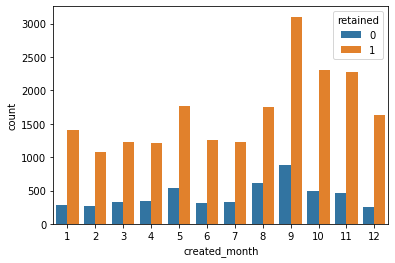

In [23]:
sns.countplot(df1['created_month'],hue=df1['retained'])

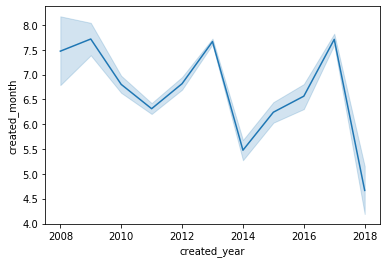

In [31]:
sns.lineplot(x=df1['created_year'],y=df1['created_month'])

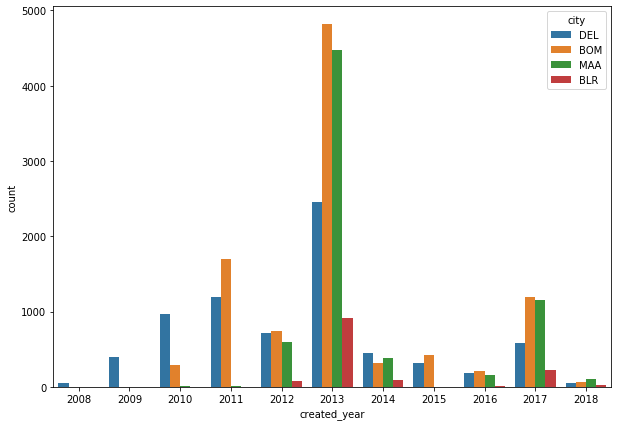

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(df1['created_year'],hue=df1['city'])

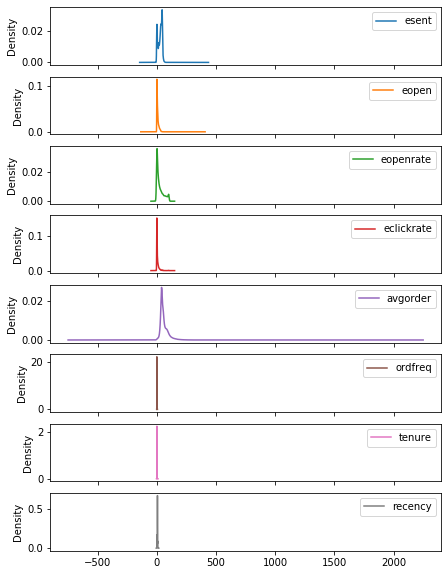

In [16]:
#plt.figure(figsize=(4,9))
df1[num_cols].plot(kind='kde',subplots=True,figsize=(7,10))
plt.show()

In [ ]:
df1[cat_cols].plot(kind='bar',subplots=True,layout=(2,3))
plt.show()